In [1]:
#4.常量、变量、占位符——本章作业已在第一次作业提交（深度-作业1）中完成

In [2]:
#5.名字与作用域

#1.总结`name_scope`与`variable_scope`的作用以及异同点。

#name_scope的作用：
#1>解决功能近似的节点name可能命名重复的问题
#2>为其作用域中的节点的name添加一个或多个前缀，并使用这些前缀作为划分内部与外部op范围的标记，同时在TensorFlow可
    #视化时可以作为一个整体出现
#3>name_scope可以通过划分操作范围来组织图结构，并能服务于可视化

#name_scope可以给Op的name加前缀，但不包括tf.get_variable()创建的变量

#variable_scope的作用：
#1>主要用于管理变量作用域以及与变量相关的操作
#2>variable_scope也可以像name_scope一样用来给不同操作区域划分范围（添加name前缀）
#3>功能更为丰富，最重要的是可以与tf.get_variable()等配合使用完成对变量的重复使用

#相同点：
#1>都可以用来给不同操作区域划分范围（添加name前缀）
#2>在运行时均可返回一个上下文管理器

#不同点：
#1>name_scope不能给tf.get_variable()创建的变量加前缀，而variabel_scope可以与tf.get_variable()等配合使用
    #完成对变量的重复使用
#2>variable_scope包含了name_scope的全部功能，即在variable_scope下也可以给Op与Tensor加上name_scope
#3>变量作用域是可以嵌套使用的

In [1]:
#2.构建逻辑回归模型（只有模型部分，不包括训练部分），使用`get_variable`与`variable_scope`将变量的创建与使用分开
#。提示：使用`tf.nn.sigmoid`实现`logistic`函数。

In [9]:
tf.nn.sigmoid??

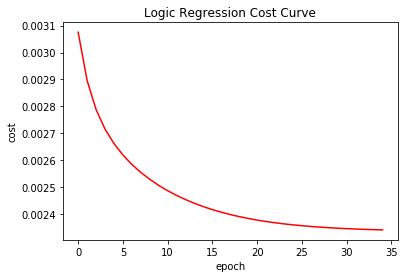

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
 
#创建占位符
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
 
#创建变量
#tf.random_normal([1])返回一个符合正太分布的随机数
with tf.variable_scope('var',reuse=None) as var:
    tf.get_variable('w1',initializer=tf.random_normal([1],name='weight'))
    tf.get_variable('b1',initializer=tf.random_normal([1],name='bias'))
with tf.variable_scope('var',reuse=True) as var:
    w = tf.get_variable('w1')
    b = tf.get_variable('b1')
#w=tf.Variable(tf.random_normal([1],name='weight'))
#b=tf.Variable(tf.random_normal([1],name='bias'))
 
y_predict=tf.sigmoid(tf.add(tf.multiply(X,w),b))
num_samples=400
cost=tf.reduce_sum(tf.pow(y_predict-Y,2.0))/num_samples
 
#学习率
lr=0.01
optimizer=tf.train.AdamOptimizer().minimize(cost)
 
#创建session 并初始化所有变量
num_epoch=500
cost_accum=[]
cost_prev=0
#np.linspace（）创建agiel等差数组，元素个数为num_samples
xs=np.linspace(-5,5,num_samples)
ys=np.sin(xs)+np.random.normal(0,0.01,num_samples)
 
with tf.Session() as sess:
  #初始化所有变量
  sess.run(tf.initialize_all_variables())
  #开始训练
  for epoch in range(num_epoch):
    for x,y in zip(xs,ys):
        sess.run(optimizer,feed_dict={X:x,Y:y})
    train_cost=sess.run(cost,feed_dict={X:x,Y:y})
    cost_accum.append(train_cost)
    #print ("train_cost is:",str(train_cost))
 
    #当误差小于10-6时 终止训练
    if np.abs(cost_prev-train_cost)<1e-6:
        break
    #保存最终的误差
    cost_prev=train_cost
#画图 画出每一轮训练所有样本之后的误差
plt.plot(range(len(cost_accum)),cost_accum,'r')
plt.title('Logic Regression Cost Curve')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [3]:
tf.get_variable??